In [23]:
import cntk as ct
import numpy as np
import cv2
from cntk.ops.functions import load_model
from PIL import Image 

In [24]:
MODEL_PATH = "ResNet_152.model"
URL = 'http://writm.com/wp-content/uploads/2016/08/Cat-hd-wallpapers.jpg'

# Open downloaded labels
#!wget "http://data.mxnet.io/models/imagenet-11k/synset.txt"

In [25]:
# Load CNTK Model
z = load_model(MODEL_PATH)

In [26]:
# Get last layer -> 3
for index in range(len(z.outputs)):
    print("Index {} for output: {}.".format(index, z.outputs[index].name))

Index 0 for output: ce.
Index 1 for output: errs.
Index 2 for output: top5Errs.
Index 3 for output: z.


In [27]:
# Load labels
with open('synset.txt', 'r') as f:
    synsets = [l.rstrip() for l in f]

In [28]:
%matplotlib inline
import matplotlib
matplotlib.rc("savefig", dpi=100)
import matplotlib.pyplot as plt
import cv2
import numpy as np
import wget

In [29]:
def get_image(url, show=True):
    filename = wget.download(url)
    img = cv2.imread(filename)
    if img is None:
        print('failed to download ' + url)
    if show:
        plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
        plt.axis('off')
    return filename

In [30]:
def predict(filename, synsets):
    img = cv2.cvtColor(cv2.imread(filename), cv2.COLOR_BGR2RGB)
    if img is None:
        return None
    img = cv2.resize(img, (224, 224))
    img = np.swapaxes(img, 0, 2)
    img = np.swapaxes(img, 1, 2) 
    img = img[np.newaxis, :] 
    
    # Convert to array
    img = np.array(img, dtype=np.float32)
    
    # Use last layer
    z_out = ct.combine([z.outputs[3].owner])
    prob = np.squeeze(z_out.eval({z_out.arguments[0]:img}))

    a = np.argsort(prob)[::-1]    
    for i in a[0:5]:
        print('probability=%f, class=%s' %(prob[i], synsets[i]))

/anaconda/envs/cntk-py34/lib/python3.4/site-packages/cntk/utils/__init__.py:578: RuntimeWarning: supplied data is not C contiguous; rearrange your data/computation to avoid this
  warnings.warn('supplied data is not C contiguous; rearrange your data/computation to avoid this', RuntimeWarning)


probability=8.727671, class=n01515303 bird of passage
probability=8.535578, class=n01549886 phoebe, phoebe bird, Sayornis phoebe
probability=8.372093, class=n01549641 western wood pewee, Contopus sordidulus
probability=8.241817, class=n01514752 gamecock, fighting cock
probability=7.554939, class=n01519873 emu, Dromaius novaehollandiae, Emu novaehollandiae


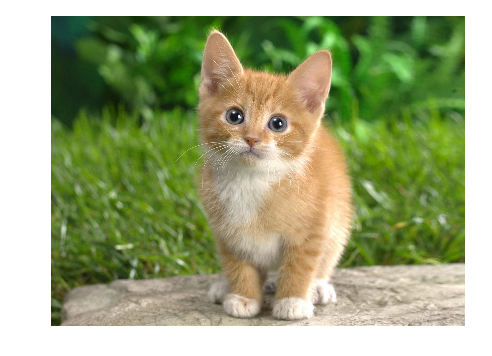

In [31]:
predict(get_image(url), synsets)